# ENTREGA FINAL PROYECTO 2 BI

Integrantes:
    
* Andres Felipe Delgado
* Jaime Torres
* Sebastian Gonzalez

# CARGUE DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar base de poblaciones y municipios
poblaciones = pd.read_excel("poblacion_municipios.xlsx",converters={"DPMP":str})

In [3]:
# Se cargan los datos base 2010-2017
df_original = pd.read_csv('data_2010_2017.csv')
df_original.head()

C:\Users\Sebastian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


anio codigo_depto nombre_depto nombre_muni codigo_muni codigo_evento  \
0  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
1  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
2  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
3  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
4  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   

  evento         edad           sexo  num_casos  
0  TOTAL        TOTAL          TOTAL   200524.0  
1  TOTAL        TOTAL        Hombres   114264.0  
2  TOTAL        TOTAL        Mujeres    86250.0  
3  TOTAL        TOTAL  Indeterminado       10.0  
4  TOTAL  Menor 1 año        Hombres     4745.0

In [4]:
# Se cargan los datos base 2018_2020
df_nuevo = pd.read_csv('data_2018_2020.csv')
df_nuevo.head()

C:\Users\Sebastian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


anio codigo_depto nombre_depto nombre_muni codigo_muni codigo_evento  \
0  2018        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
1  2018        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
2  2018        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
3  2018        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
4  2018        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   

  evento         edad           sexo  num_casos  
0  TOTAL        TOTAL          TOTAL   228271.0  
1  TOTAL        TOTAL        Hombres   125743.0  
2  TOTAL        TOTAL        Mujeres   102462.0  
3  TOTAL        TOTAL  Indeterminado       66.0  
4  TOTAL  Menor 1 año        Hombres     3896.0

In [5]:
#Union de bases
df_original = df_original.append(df_nuevo, ignore_index = True)

In [6]:
df_original.shape

(1726048, 10)

# Perfilado

In [7]:
#Se crea una columna para validar si la fila contiene totales
df_original["tiene_totales"]= df_original.apply(lambda x:False if(x.anio!="TOTAL" and x.codigo_depto !="TOTAL"and x.nombre_depto !="TOTAL"and x.nombre_muni !="TOTAL"and x.codigo_muni !="TOTAL"and x.codigo_evento !="TOTAL"and x.evento !="TOTAL"and x.edad !="TOTAL"and x.sexo !="TOTAL") else True ,axis=1)

In [17]:
df_original.head()

anio codigo_depto nombre_depto nombre_muni codigo_muni codigo_evento  \
0  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
1  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
2  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
3  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   
4  2010        TOTAL        TOTAL       TOTAL       TOTAL         TOTAL   

  evento         edad           sexo  num_casos  tiene_totales  
0  TOTAL        TOTAL          TOTAL   200524.0           True  
1  TOTAL        TOTAL        Hombres   114264.0           True  
2  TOTAL        TOTAL        Mujeres    86250.0           True  
3  TOTAL        TOTAL  Indeterminado       10.0           True  
4  TOTAL  Menor 1 año        Hombres     4745.0           True

In [8]:
# Se filtran las filas que no contienen totales
df_filtrado = df_original[df_original["tiene_totales"]== False]

In [9]:
#Revisamos eventos con mayor cantidad de registros
df_filtrado['evento'].value_counts()

ENFERMEDADES ISQUEMICAS DEL CORAZON                          31684
ENFERMEDADES CEREBROVASCULARES                               22801
ENF. CRONICAS VIAS REPIRATORIAS INFERIORES                   18548
INFECCIONES RESPIRATORIAS AGUDAS                             17642
ENFERMEDADES HIPERTENSIVAS                                   16326
                                                             ...  
Aterosclerosis                                                 132
PARO CARDIACO                                                  124
Los demás accidentes de transporte y los no especificados      116
Accidentes por disparo de arma de fuego                        108
Paro cardíaco                                                    4
Name: evento, Length: 140, dtype: int64

In [10]:
#Revisamos valores en la columna edad
df_filtrado['edad'].value_counts()

De 45-64 años       151573
De 65 y más         126273
De 65-84 años       125352
De 15-44 años       101870
De 85-99 años        74598
Menor 1 año          36679
De 5-14 años         15932
De 1-4 años          12883
De 100 y más          5493
Edad desconocida      1247
Name: edad, dtype: int64

In [11]:
#Se ajustan los rangos de edades para evitar cruces
df_filtrado["edad"]= df_filtrado.apply(lambda x:"De 65 y más" if(x["edad"]=="De 65-84 años" or x["edad"]=="De 85-99 años"or x["edad"]=="De 100 y más") else x["edad"],axis=1)

<ipython-input-11-e7c88d1141c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["edad"]= df_filtrado.apply(lambda x:"De 65 y más" if(x["edad"]=="De 65-84 años" or x["edad"]=="De 85-99 años"or x["edad"]=="De 100 y más") else x["edad"],axis=1)


In [22]:
#Realizamos perfilado de datos
import pandas_profiling

profiling = pandas_profiling.ProfileReport(df_filtrado)
profiling

In [138]:
df_filtrado.to_excel("base_enfermedades.xlsx",index = False)

# Procesamiento

In [12]:
# Seleccion de columnas
df_base = df_filtrado.drop(columns=["codigo_depto","nombre_depto","nombre_muni","codigo_evento","tiene_totales"])

In [13]:
# Crear llave año y municipio
df_base['anio_muni'] = df_base['anio'].astype(str) + '_' + df_base['codigo_muni'].astype(str)

In [14]:
# Llave como index
df_base = df_base.set_index(df_base['anio_muni'])

In [15]:
# Seleccion de columnas
df_base = df_base.drop(columns=["anio","codigo_muni","sexo"])
df_base.reset_index(drop=True, inplace=True)

In [16]:
df_base.head()

evento           edad  num_casos   anio_muni
0  ENFERMEDADES INFECCIOSAS INTESTINALES  De 15-44 años        2.0  2010_05001
1  ENFERMEDADES INFECCIOSAS INTESTINALES  De 15-44 años        2.0  2010_05001
2  ENFERMEDADES INFECCIOSAS INTESTINALES  De 45-64 años        7.0  2010_05001
3  ENFERMEDADES INFECCIOSAS INTESTINALES  De 45-64 años        5.0  2010_05001
4  ENFERMEDADES INFECCIOSAS INTESTINALES    De 65 y más       12.0  2010_05001

In [17]:
# Pivot agrupando por año municipio y evento, edades como columnas y suma de numero de muertes
pivot_edad = pd.pivot_table(df_base,index=["anio_muni","evento"],values=["num_casos"],columns=["edad"],aggfunc=[np.sum],fill_value=0)

In [18]:
# Convertir pivot en dataframe
pivot_edad = pd.DataFrame(pivot_edad.to_records())
pivot_edad.head()

anio_muni                                             evento  \
0  2010_05001        ACC. CAUSADOS POR DISPARO DE ARMAS DE FUEGO   
1  2010_05001      ACC. TRANSPORTE TERRESTRE, INCLUSIVE SECUELAS   
2  2010_05001        AGRESIONES (HOMICIDIOS), INCLUSIVE SECUELAS   
3  2010_05001               AHOGAMIENTO Y SUMERSION ACCIDENTALES   
4  2010_05001  APENDICITIS, HERNIA CAVIDAD ABDOMINAL Y OBSTR....   

   ('sum', 'num_casos', 'De 1-4 años')  ('sum', 'num_casos', 'De 15-44 años')  \
0                                    0                                      1   
1                                    0                                    181   
2                                    1                                   1541   
3                                    2                                      8   
4                                    1                                      1   

   ('sum', 'num_casos', 'De 45-64 años')  \
0                                      0   
1                                     89   
2                                    191   
3                                      2   
4                                      9   

   ('sum', 'num_casos', 'De 5-14 años')  ('sum', 'num_casos', 'De 65 y más')  \
0                                     0                                    1   
1                                    11                                   67   
2                                    37                                   24   
3                                     4                                    2   
4                                     0                                   55   

   ('sum', 'num_casos', 'Edad desconocida')  \
0                                         0   
1                                         2   
2                                         9   
3                                         0   
4                                         0   

   ('sum', 'num_casos', 'Menor 1 año')  
0                                    0  
1                                    1  
2                                    2  
3                                    1  
4                                    0

In [19]:
pivot_edad = pivot_edad.rename(columns={"('sum', 'num_casos', 'De 1-4 años')": 'De 1-4 años', "('sum', 'num_casos', 'De 15-44 años')": 'De 15-44 años',"('sum', 'num_casos', 'De 45-64 años')": 'De 45-64 años',"('sum', 'num_casos', 'De 5-14 años')": 'De 5-14 años',"('sum', 'num_casos', 'De 65 y más')": 'De 65 y más',"('sum', 'num_casos', 'Edad desconocida')": 'Edad desconocida',"('sum', 'num_casos', 'Menor 1 año')": 'Menor 1 año'})
pivot_edad.head()

anio_muni                                             evento  De 1-4 años  \
0  2010_05001        ACC. CAUSADOS POR DISPARO DE ARMAS DE FUEGO            0   
1  2010_05001      ACC. TRANSPORTE TERRESTRE, INCLUSIVE SECUELAS            0   
2  2010_05001        AGRESIONES (HOMICIDIOS), INCLUSIVE SECUELAS            1   
3  2010_05001               AHOGAMIENTO Y SUMERSION ACCIDENTALES            2   
4  2010_05001  APENDICITIS, HERNIA CAVIDAD ABDOMINAL Y OBSTR....            1   

   De 15-44 años  De 45-64 años  De 5-14 años  De 65 y más  Edad desconocida  \
0              1              0             0            1                 0   
1            181             89            11           67                 2   
2           1541            191            37           24                 9   
3              8              2             4            2                 0   
4              1              9             0           55                 0   

   Menor 1 año  
0            0  
1            1  
2            2  
3            1  
4            0

In [20]:
# Separar año y municipio
pivot_edad[['anio','muni']] = pivot_edad['anio_muni'].str.split('_',expand=True)
pivot_edad=pivot_edad.fillna(0)
pivot_edad=pivot_edad.replace(np.nan, 0)
pivot_edad['anio'] = pivot_edad['anio'].astype(int)

In [21]:
# Codigo municipio como index de poblaciones
poblaciones = poblaciones.set_index(poblaciones['DPMP'])
poblaciones.head()

DP      DPNOM   DPMP        MPIO     2005     2006     2007     2008  \
DPMP                                                                          
05001   5  Antioquia  05001    Medellín  2214494  2239003  2265244  2291378   
05002   5  Antioquia  05002   Abejorral    20249    20113    20022    19930   
05004   5  Antioquia  05004    Abriaquí     2690     2636     2570     2504   
05021   5  Antioquia  05021  Alejandría     3816     3789     3747     3724   
05030   5  Antioquia  05030       Amagá    27155    27455    27709    27950   

          2009     2010     2011     2012     2013     2014     2015     2016  \
DPMP                                                                            
05001  2317336  2343049  2368282  2393011  2417325  2441123  2464322  2486723   
05002    19853    19750    19672    19570    19478    19382    19290    19195   
05004     2458     2397     2336     2290     2231     2175     2128     2075   
05021     3688     3652     3618     3575     3550     3502     3466     3435   
05030    28192    28433    28664    28897    29117    29339    29555    29770   

          2017     2018     2019     2020  
DPMP                                       
05001  2508452  2529403  2549537  2569007  
05002    19096    18991    18882    18779  
05004     2019     1971     1918     1870  
05021     3393     3361     3307     3278  
05030    29980    30181    30376    30561

In [22]:
# Se crea funcion para traer dato de poblacion de un municipio en cierto año
def traer_poblacion(muni,anio):
    dato=""
    try:
        dato =  poblaciones.at[str(muni),int(anio)]
    except:
        dato = 0
    return dato

In [23]:
#Se crea una columna con poblacion del municipio
pivot_edad["poblacion"]= pivot_edad.apply(lambda x: traer_poblacion(x["muni"],x["anio"]),axis=1)
df_filtrado["poblacion"]= df_filtrado.apply(lambda x: traer_poblacion(x["codigo_muni"],x["anio"]),axis=1)

<ipython-input-23-80a5fd9e5beb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["poblacion"]= df_filtrado.apply(lambda x: traer_poblacion(x["codigo_muni"],x["anio"]),axis=1)


In [24]:
# Se crea funcion para calcular la tasa de muertes per capita
def calcularTasa(muertes,poblacion):
    div=0
    try:
        div=muertes/poblacion
    except:
        div=0
    return div

In [25]:
# Calculo Tasas per capita
pivot_edad["De 1-4 años"]= pivot_edad.apply(lambda x: calcularTasa(x["De 1-4 años"],x["poblacion"]),axis=1)
pivot_edad["De 15-44 años"]= pivot_edad.apply(lambda x: calcularTasa(x["De 15-44 años"],x["poblacion"]),axis=1)
pivot_edad["De 45-64 años"]= pivot_edad.apply(lambda x: calcularTasa(x["De 45-64 años"],x["poblacion"]),axis=1)
pivot_edad["De 5-14 años"]= pivot_edad.apply(lambda x: calcularTasa(x["De 5-14 años"],x["poblacion"]),axis=1)
pivot_edad["De 65 y más"]= pivot_edad.apply(lambda x: calcularTasa(x["De 65 y más"],x["poblacion"]),axis=1)
pivot_edad["Edad desconocida"]= pivot_edad.apply(lambda x: calcularTasa(x["Edad desconocida"],x["poblacion"]),axis=1)
pivot_edad["Menor 1 año"]= pivot_edad.apply(lambda x: calcularTasa(x["Menor 1 año"],x["poblacion"]),axis=1)

In [51]:
df_filtrado.head()

anio codigo_depto nombre_depto nombre_muni codigo_muni codigo_evento  \
1750  2010           05    Antioquia    Medellín       05001           101   
1751  2010           05    Antioquia    Medellín       05001           101   
1752  2010           05    Antioquia    Medellín       05001           101   
1753  2010           05    Antioquia    Medellín       05001           101   
1754  2010           05    Antioquia    Medellín       05001           101   

                                     evento           edad     sexo  \
1750  ENFERMEDADES INFECCIOSAS INTESTINALES  De 15-44 años  Hombres   
1751  ENFERMEDADES INFECCIOSAS INTESTINALES  De 15-44 años  Mujeres   
1752  ENFERMEDADES INFECCIOSAS INTESTINALES  De 45-64 años  Hombres   
1753  ENFERMEDADES INFECCIOSAS INTESTINALES  De 45-64 años  Mujeres   
1754  ENFERMEDADES INFECCIOSAS INTESTINALES    De 65 y más  Hombres   

      num_casos  tiene_totales  
1750        2.0          False  
1751        2.0          False  
1752        7.0          False  
1753        5.0          False  
1754       12.0          False

In [26]:
#Revision top causas
top_causas = df_filtrado[['num_casos', 'poblacion']].groupby(df_filtrado['evento']).sum()
top_causas['muertes_percapita'] = top_causas['num_casos'] / top_causas['poblacion']
top_causas=top_causas.sort_values(by='num_casos', ascending=False)
top_causas.reset_index(level=0, inplace=True)
top_causas

evento  num_casos   poblacion  \
0                  ENFERMEDADES ISQUEMICAS DEL CORAZON   256804.0  2385390772   
1                       ENFERMEDADES CEREBROVASCULARES   109875.0  2530131033   
2          AGRESIONES (HOMICIDIOS), INCLUSIVE SECUELAS   100943.0  2082437680   
3                  Enfermedades isquémicas del corazón    98668.0  1186875123   
4           ENF. CRONICAS VIAS REPIRATORIAS INFERIORES    95221.0  2084108502   
..                                                 ...        ...         ...   
135  Fiebre reumática aguda y enfermedades reumátic...      156.0   176519852   
136                                     Aterosclerosis      149.0   154993079   
137                                      PARO CARDIACO      148.0    72831187   
138            Accidentes por disparo de arma de fuego      115.0    52823035   
139                                      Paro cardíaco        4.0     2153621   

     muertes_percapita  
0         1.076570e-04  
1         4.342660e-05  
2         4.847348e-05  
3         8.313259e-05  
4         4.568908e-05  
..                 ...  
135       8.837533e-07  
136       9.613332e-07  
137       2.032096e-06  
138       2.177081e-06  
139       1.857337e-06  

[140 rows x 4 columns]

In [27]:
# Sacamos la primera causa
primera_causa = top_causas.at[0,"evento"]
primera_causa

'ENFERMEDADES ISQUEMICAS DEL CORAZON'

In [132]:
# Crea dataframe con datos unicamente el evento con mas casos
top_df = pivot_edad[pivot_edad["evento"]==primera_causa]
top_df.head()

anio_muni                               evento  De 1-4 años  \
22   2010_05001  ENFERMEDADES ISQUEMICAS DEL CORAZON          0.0   
81   2010_05002  ENFERMEDADES ISQUEMICAS DEL CORAZON          0.0   
108  2010_05004  ENFERMEDADES ISQUEMICAS DEL CORAZON          0.0   
118  2010_05021  ENFERMEDADES ISQUEMICAS DEL CORAZON          0.0   
141  2010_05030  ENFERMEDADES ISQUEMICAS DEL CORAZON          0.0   

     De 15-44 años  De 45-64 años  De 5-14 años  De 65 y más  \
22        0.000016       0.000166           0.0     0.000581   
81        0.000000       0.000354           0.0     0.001063   
108       0.000000       0.000000           0.0     0.000417   
118       0.000000       0.000000           0.0     0.000274   
141       0.000070       0.000387           0.0     0.000950   

     Edad desconocida  Menor 1 año  anio   muni  poblacion  
22           0.000003          0.0  2010  05001    2343049  
81           0.000000          0.0  2010  05002      19750  
108          0.000000          0.0  2010  05004       2397  
118          0.000000          0.0  2010  05021       3652  
141          0.000000          0.0  2010  05030      28433

In [133]:
#Eliminar columnas
top_df = top_df.drop(columns=['evento', 'anio', 'muni'])

In [32]:
top_df.dtypes

anio_muni            object
De 1-4 años         float64
De 15-44 años       float64
De 45-64 años       float64
De 5-14 años        float64
De 65 y más         float64
Edad desconocida    float64
Menor 1 año         float64
poblacion             int64
dtype: object

In [134]:
#Suma de muertes
top_df['muertes_percapita'] = top_df['De 1-4 años']+top_df['De 15-44 años']+top_df['De 45-64 años']+top_df['De 5-14 años']+top_df['De 65 y más']+top_df['Edad desconocida']+top_df['Menor 1 año']

In [135]:
# Se reemplazan valores
top_df = top_df.set_index(top_df['anio_muni'])

top_df = top_df.drop(columns=['poblacion',"anio_muni"])
top_df=top_df.fillna(0)
top_df=top_df.replace(np.nan, 0)
top_df = top_df.replace([0],0.0000000001)
top_df.head()

De 1-4 años  De 15-44 años  De 45-64 años  De 5-14 años  \
anio_muni                                                              
2010_05001  1.000000e-10   1.579139e-05   1.660230e-04  1.000000e-10   
2010_05002  1.000000e-10   1.000000e-10   3.544304e-04  1.000000e-10   
2010_05004  1.000000e-10   1.000000e-10   1.000000e-10  1.000000e-10   
2010_05021  1.000000e-10   1.000000e-10   1.000000e-10  1.000000e-10   
2010_05030  1.000000e-10   7.034080e-05   3.868744e-04  1.000000e-10   

            De 65 y más  Edad desconocida   Menor 1 año  muertes_percapita  
anio_muni                                                                   
2010_05001     0.000581      2.987560e-06  1.000000e-10           0.000766  
2010_05002     0.001063      1.000000e-10  1.000000e-10           0.001418  
2010_05004     0.000417      1.000000e-10  1.000000e-10           0.000417  
2010_05021     0.000274      1.000000e-10  1.000000e-10           0.000274  
2010_05030     0.000950      1.000000e-10  1.000000e-10           0.001407

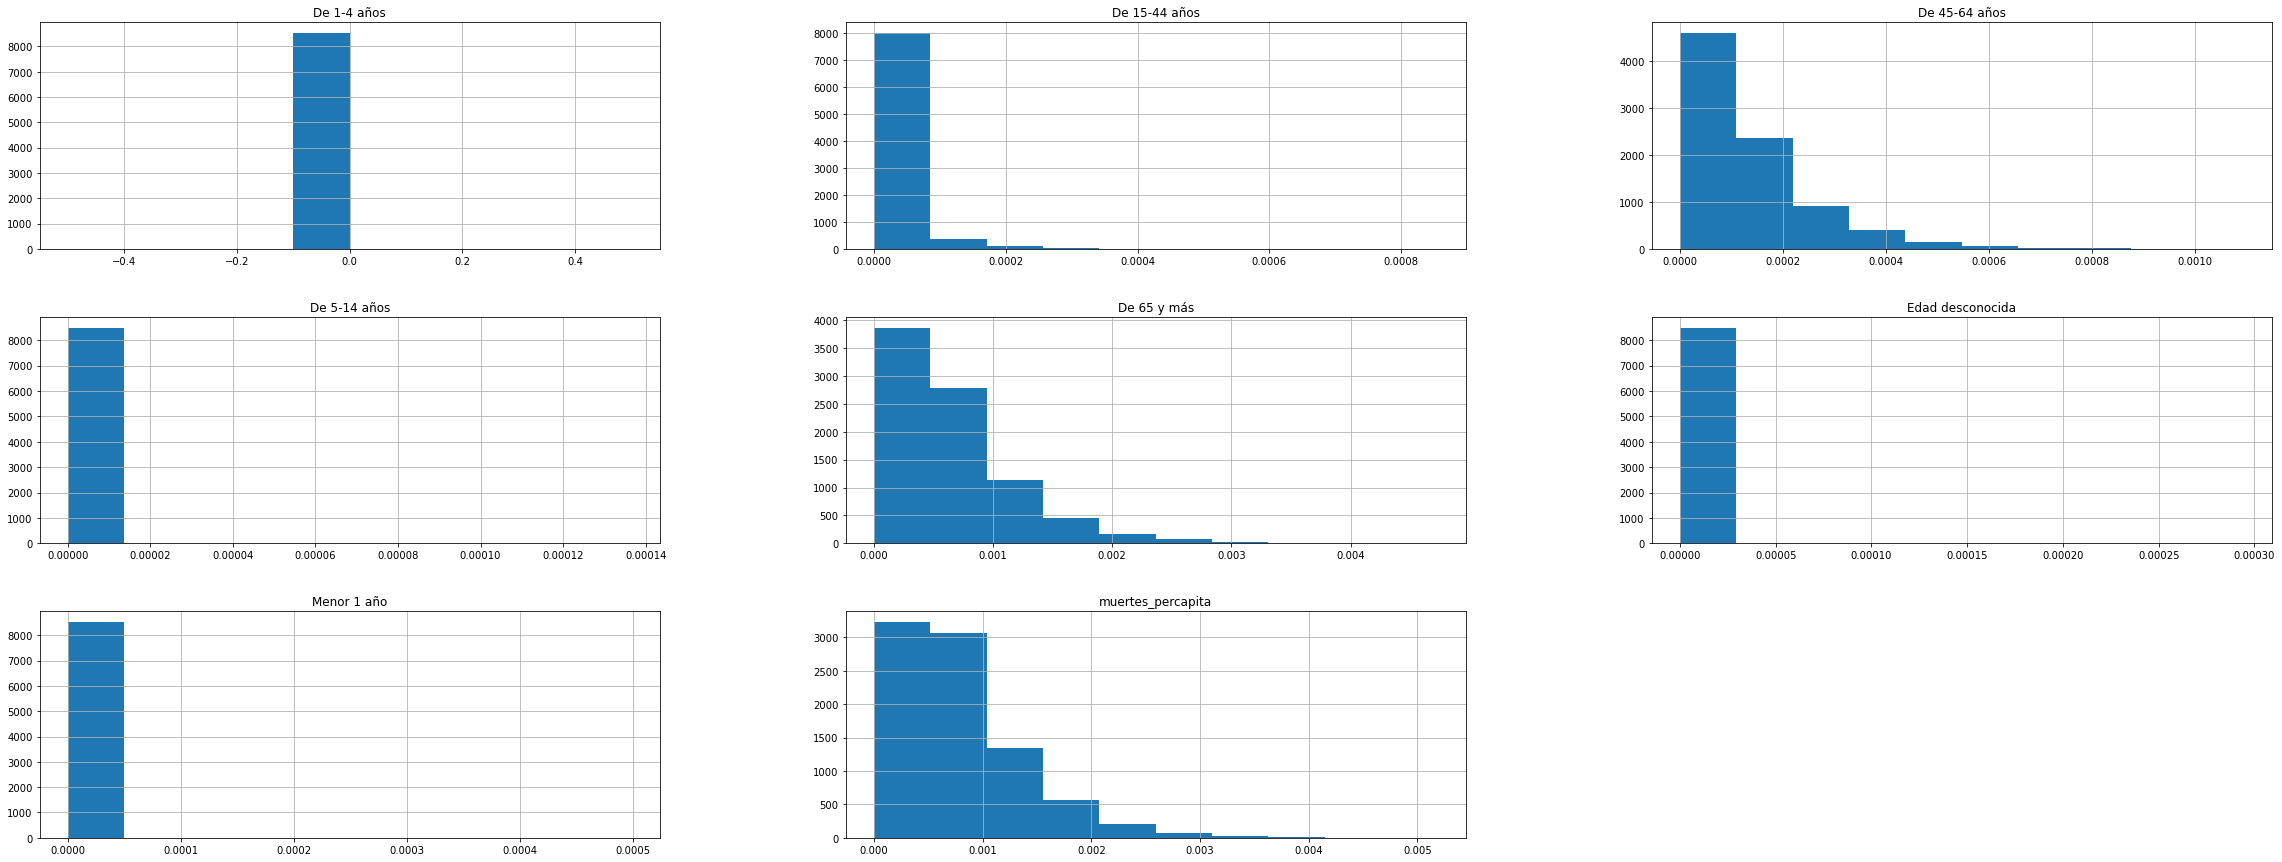

In [35]:
# Revision de distribuciones
top_df.hist(figsize = (40, 15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

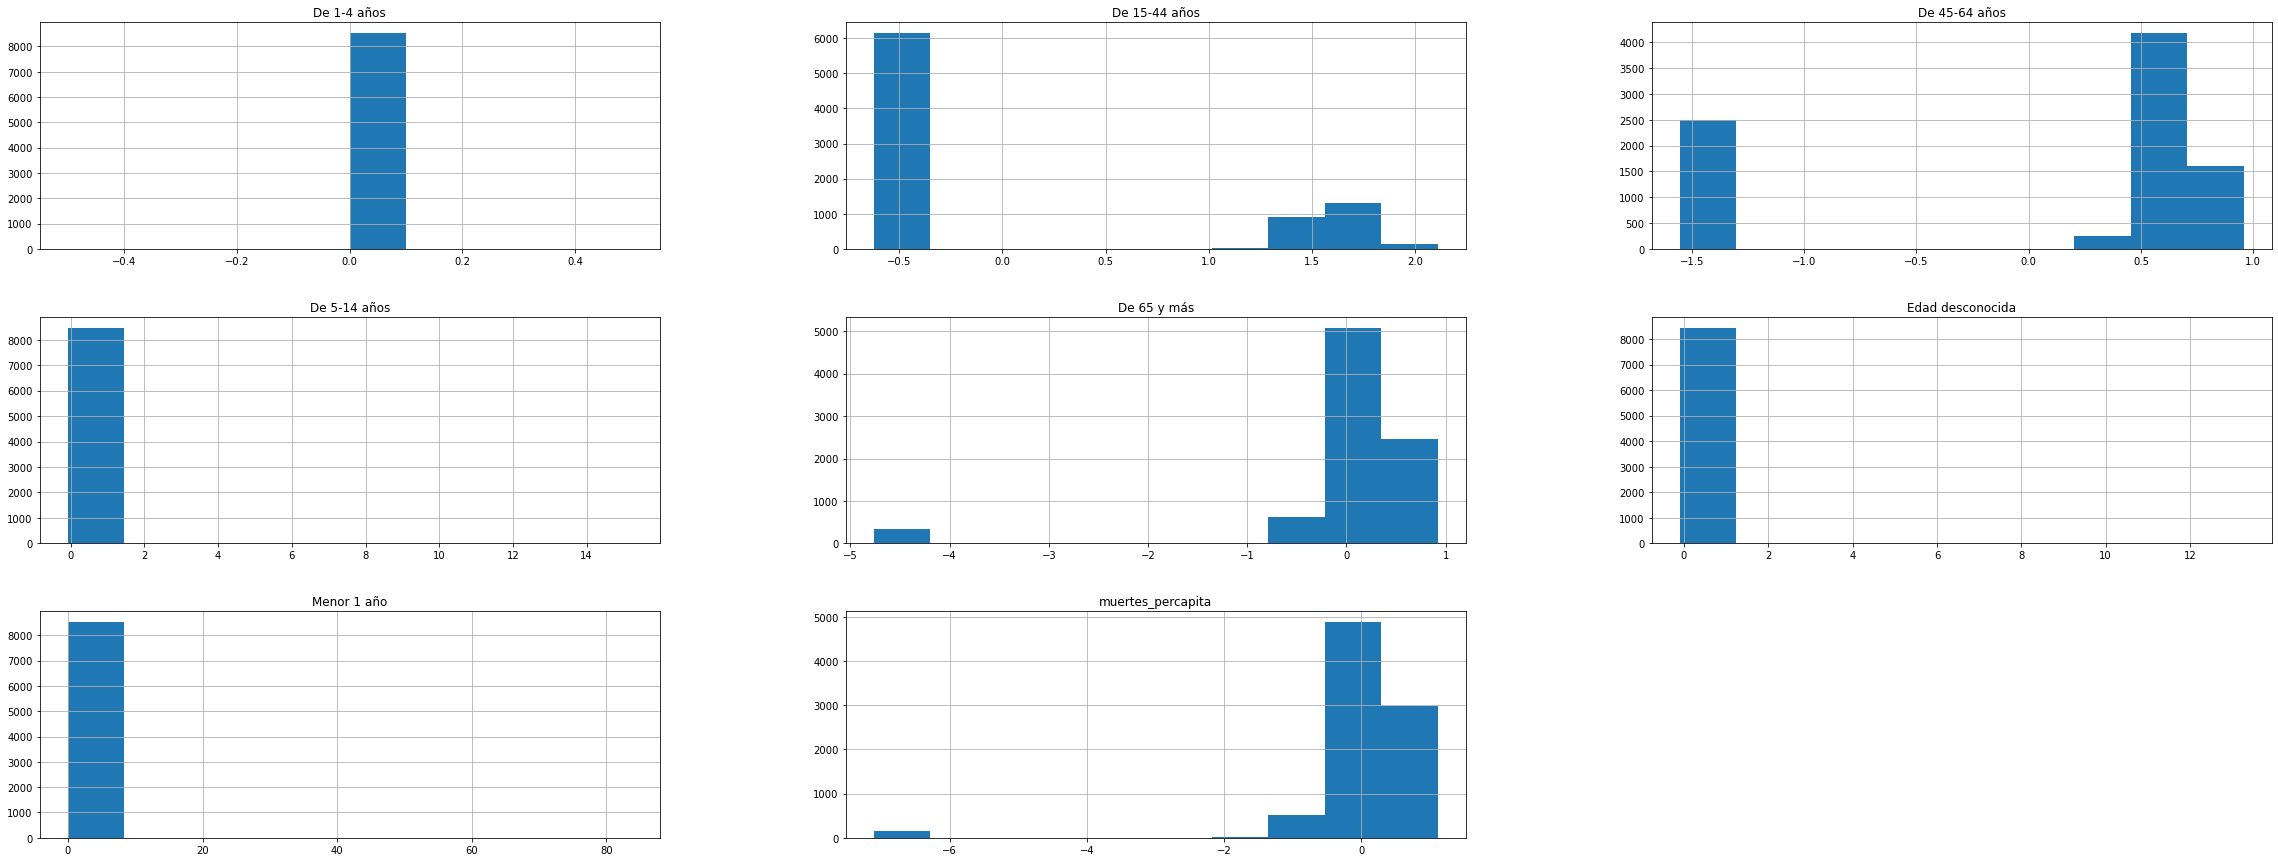

In [49]:
# Transformaciones
from sklearn import preprocessing

log_df = pd.DataFrame()
for col in top_df.columns:
    log_df[col] = np.log(top_df[col])
#     hd_df[col] = (hd_df[col] - hd_df[col].min())/(hd_df[col].max() - hd_df[col].min())
#     hd_df = hd_df.rename(columns = {col:f'log_norm_{col}'})  

transformed_df = pd.DataFrame(preprocessing.scale(log_df), columns = log_df.columns).set_index(top_df.index)
#transformed_df=transformed_df.replace(np.nan, 0)
#transformed_df = transformed_df.replace([0],0.0000000001)

transformed_df.hist(figsize=(40, 15))
plt.show

In [50]:
# Funcion para revisar correlaciones
def coll_check(data, size=(11,9)):
    # Create a covariance matrix
    corr = data.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize = size)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, vmin=-.4, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
#     plt.savefig('cov_matrix_' + str(len(data.columns)) + '_inputs.png', dpi=100)

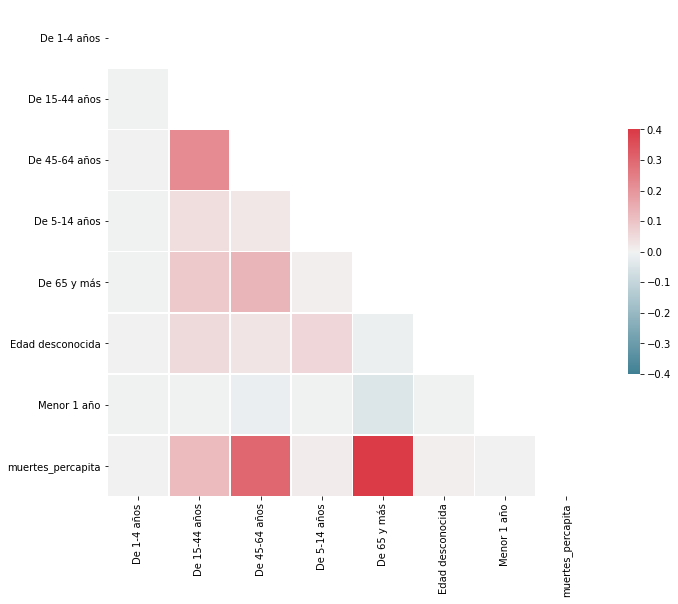

In [39]:
coll_check(transformed_df)

In [51]:
transformed_df.head()

De 1-4 años  De 15-44 años  De 45-64 años  De 5-14 años  \
anio_muni                                                             
2010_05001          0.0       1.424675       0.664564     -0.076741   
2010_05002          0.0      -0.621346       0.781954     -0.076741   
2010_05004          0.0      -0.621346      -1.552403     -0.076741   
2010_05021          0.0      -0.621346      -1.552403     -0.076741   
2010_05030          0.0       1.680027       0.795512     -0.076741   

            De 65 y más  Edad desconocida  Menor 1 año  muertes_percapita  
anio_muni                                                                  
2010_05001     0.243344          9.149448    -0.014386           0.226121  
2010_05002     0.437664         -0.094832    -0.014386           0.510941  
2010_05004     0.136964         -0.094832    -0.014386          -0.054611  
2010_05021     0.001636         -0.094832    -0.014386          -0.249278  
2010_05030     0.401319         -0.094832    -0.014386           0.507371

In [137]:
# Clasificacion de muertes per capita en grupos
hd_classify_df = transformed_df
hd_classify_df['anio_muni'] = hd_classify_df.index
hd_classify_df[['anio','muni']] = hd_classify_df['anio_muni'].str.split('_',expand=True)
hd_classify_df['riesgo'] = pd.qcut(hd_classify_df['muertes_percapita'], 3, labels=[1, 2, 3]).astype(int)
hd_classify_df = hd_classify_df.drop(columns=['muertes_percapita','anio_muni'])
hd_classify_df.head(5)
hd_classify_df.to_excel("riesgos_originales.xlsx")

In [84]:
lag_df = hd_classify_df[(hd_classify_df['anio'] >= 2015) & (hd_classify_df['anio'] <= 2020)]
df = hd_classify_df[(hd_classify_df['anio'] >= 2015) & (hd_classify_df['anio'] <= 2020)]

trailing_window_size = 3

for window in range(1, trailing_window_size + 1):
    shifted = df.shift(window)
    shifted.columns = [x + "_lag" + str(window) for x in df.columns]
    
    lag_df = pd.concat((lag_df, shifted), axis=1)
lag_df = lag_df.dropna()
lag_df.head()

De 1-4 años  De 15-44 años  De 45-64 años  De 5-14 años  \
anio_muni                                                             
2015_05021          0.0      -0.621346       0.750105     -0.076741   
2015_05030          0.0       1.554931       0.588406     -0.076741   
2015_05031          0.0      -0.621346       0.570722     -0.076741   
2015_05034          0.0      -0.621346       0.672378     -0.076741   
2015_05036          0.0      -0.621346       0.710625     -0.076741   

            De 65 y más  Edad desconocida  Menor 1 año  anio   muni  riesgo  \
anio_muni                                                                     
2015_05021     0.018437         -0.094832    -0.014386  2015  05021       2   
2015_05030     0.240192         -0.094832    -0.014386  2015  05030       2   
2015_05031     0.129382         -0.094832    -0.014386  2015  05031       2   
2015_05034     0.223262         -0.094832    -0.014386  2015  05034       2   
2015_05036    -0.063540         -0.094832    -0.014386  2015  05036       1   

            ...  De 1-4 años_lag3  De 15-44 años_lag3  De 45-64 años_lag3  \
anio_muni   ...                                                             
2015_05021  ...               0.0            1.396492            0.627493   
2015_05030  ...               0.0           -0.621346            0.591688   
2015_05031  ...               0.0           -0.621346            0.825614   
2015_05034  ...               0.0           -0.621346            0.750105   
2015_05036  ...               0.0            1.554931            0.588406   

            De 5-14 años_lag3  De 65 y más_lag3  Edad desconocida_lag3  \
anio_muni                                                                
2015_05021          -0.076741          0.233438              -0.094832   
2015_05030          -0.076741          0.357839              -0.094832   
2015_05031          -0.076741          0.175223              -0.094832   
2015_05034          -0.076741          0.018437              -0.094832   
2015_05036          -0.076741          0.240192              -0.094832   

            Menor 1 año_lag3  anio_lag3 muni_lag3  riesgo_lag3  
anio_muni                                                       
2015_05021         -0.014386     2015.0     05001          2.0  
2015_05030         -0.014386     2015.0     05002          3.0  
2015_05031         -0.014386     2015.0     05004          3.0  
2015_05034         -0.014386     2015.0     05021          2.0  
2015_05036         -0.014386     2015.0     05030          2.0  

[5 rows x 40 columns]

In [85]:
#Eliminar columnas de años,municipios y riesgos
lag_df = lag_df.drop(columns=['anio_lag1',"muni_lag1","riesgo_lag1",'anio_lag2',"muni_lag2","riesgo_lag2",'anio_lag3',"muni_lag3","riesgo_lag3"])

In [82]:
lag_df.columns

Index(['De 1-4 años', 'De 15-44 años', 'De 45-64 años', 'De 5-14 años',
       'De 65 y más', 'Edad desconocida', 'Menor 1 año', 'anio', 'muni',
       'riesgo', 'De 1-4 años_lag1', 'De 15-44 años_lag1',
       'De 45-64 años_lag1', 'De 5-14 años_lag1', 'De 65 y más_lag1',
       'Edad desconocida_lag1', 'Menor 1 año_lag1', 'De 1-4 años_lag2',
       'De 15-44 años_lag2', 'De 45-64 años_lag2', 'De 5-14 años_lag2',
       'De 65 y más_lag2', 'Edad desconocida_lag2', 'Menor 1 año_lag2',
       'De 1-4 años_lag3', 'De 15-44 años_lag3', 'De 45-64 años_lag3',
       'De 5-14 años_lag3', 'De 65 y más_lag3', 'Edad desconocida_lag3',
       'Menor 1 año_lag3'],
      dtype='object')

In [118]:
lag_df['Riesgo'] = lag_df['riesgo']
lag_df = lag_df.drop(columns=['riesgo', 'anio', 'muni'])
lag_df = lag_df.rename(columns={'Riesgo': 'riesgo'})


KeyError: "['anio' 'muni'] not found in axis"

In [119]:
# guardar df
lag_df.to_csv('final_dataset.csv')

In [88]:
#Particion de datos, variables explicativas y target

features = lag_df.copy()
features = features.drop(columns=['riesgo'])
target = lag_df['riesgo']

In [90]:
#Particion conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=123)



In [91]:
#Caracteristicas

from sklearn.decomposition import PCA

pca = PCA(n_components=.99, random_state=123)
feat_pca = pca.fit_transform(features)
n_feat = feat_pca.shape[1]

print(f'Number of Features: {n_feat}\n')
print(f'Cumulative Sum Variance:\n{np.cumsum(pca.explained_variance_ratio_)}')

Number of Features: 23

Cumulative Sum Variance:
[0.10100172 0.19868274 0.29620787 0.3937105  0.48483834 0.5413789
 0.59020166 0.63840941 0.6859256  0.72261786 0.75579142 0.7871901
 0.81832528 0.84407829 0.86816533 0.89170316 0.91037929 0.92887533
 0.94721511 0.96533304 0.97404541 0.98274905 0.9914067 ]


In [92]:
#Arbol de decision Pipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_pipe = Pipeline([('pca', PCA(n_components=n_feat, random_state=123)), 
                      ('clf', DecisionTreeClassifier(random_state=123))])

tree_grid = [{'clf__criterion': ['gini', 'entropy'],
              'clf__max_depth': list(range(1, 11, 2)), 
              'clf__min_samples_split': [i/100 for i in range(5, 96, 10)], 
              'clf__min_samples_leaf': list(range(1, 11, 2))}]

acc_meas = 'balanced_accuracy'
tree_gridsearch = GridSearchCV(estimator = tree_pipe, 
                              param_grid = tree_grid, 
                              scoring = acc_meas, 
                              cv=5, verbose = 1, return_train_score = True)

tree_gridsearch.fit(X_train, y_train)
print(f'Best Decision Tree Pipeline Score: {tree_gridsearch.best_score_}')
print(f'Parameters: {tree_gridsearch.best_params_}')

results = {'Pipeline': ['Decision Tree'], 
           'Top Score': [tree_gridsearch.best_score_], 
           'Parameters': [tree_gridsearch.best_params_]}

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Decision Tree Pipeline Score: 0.5940658655880178
Parameters: {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 0.05}


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:  2.0min finished


In [94]:
# Regresion
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline([('pca', PCA(n_components=n_feat, random_state=123)), 
                        ('logreg', LogisticRegression(C=1, penalty='l1', solver='liblinear',random_state=123))])

logreg_grid = [{'logreg__C': [.001, 0.01, 0.1, 1, 10, 100, 1000], 
                'logreg__penalty': ['l1', 'l2']}]

logreg_gridsearch = GridSearchCV(estimator = logreg_pipe, 
                                 param_grid = logreg_grid, 
                                 scoring = acc_meas, 
                                 cv = 5, verbose = 1, return_train_score = True)

logreg_gridsearch.fit(X_train, y_train)

print(f'Best Logistic Regression Pipeline Score: {logreg_gridsearch.best_score_}')
print(f'Parameters: {logreg_gridsearch.best_params_}')

results['Pipeline'].append('Logistic Regression')
results['Top Score'].append(logreg_gridsearch.best_score_)
results['Parameters'].append(logreg_gridsearch.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best Logistic Regression Pipeline Score: 0.8640287552737643
Parameters: {'logreg__C': 1000, 'logreg__penalty': 'l2'}


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   32.1s finished


In [95]:
# Resultados

results_df = pd.DataFrame.from_dict(results)
results_df



Pipeline  Top Score  \
0        Decision Tree   0.594066   
1  Logistic Regression   0.878299   
2  Logistic Regression   0.864029   

                                          Parameters  
0  {'clf__criterion': 'gini', 'clf__max_depth': 9...  
1        {'logreg__C': 100, 'logreg__penalty': 'l2'}  
2       {'logreg__C': 1000, 'logreg__penalty': 'l2'}

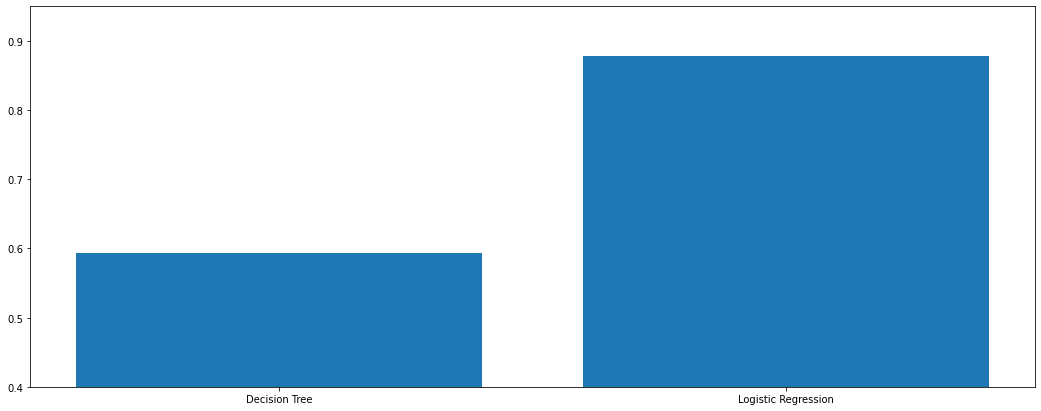

In [96]:
plt.figure(figsize=(18, 7))
plt.bar(results_df['Pipeline'], results_df['Top Score'])
plt.ylim(.4, .95)
plt.show()

In [97]:
# Metricas

from sklearn.metrics import accuracy_score

# For each model, print the accuracy score and classification report.
tree_preds = tree_gridsearch.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_preds)

logreg_preds = logreg_gridsearch.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_preds)

print(f'Decision Tree Accuracy: {tree_accuracy*100:.2f}%')
print(f'---------Classification Report---------\n{classification_report(y_test, tree_preds)}\n')

print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}%')
print(f'---------Classification Report---------\n{classification_report(y_test, logreg_preds)}\n')

Decision Tree Accuracy: 60.88%
---------Classification Report---------
              precision    recall  f1-score   support

           1       0.71      0.77      0.74       217
           2       0.42      0.43      0.42       192
           3       0.66      0.61      0.63       230

    accuracy                           0.61       639
   macro avg       0.60      0.60      0.60       639
weighted avg       0.61      0.61      0.61       639


Logistic Regression Accuracy: 86.23%
---------Classification Report---------
              precision    recall  f1-score   support

           1       0.82      0.94      0.88       217
           2       0.87      0.65      0.74       192
           3       0.90      0.97      0.93       230

    accuracy                           0.86       639
   macro avg       0.86      0.85      0.85       639
weighted avg       0.86      0.86      0.86       639




## Prediccion

In [103]:
# Create dataframe from 2016 data
pred_2019_df = lag_df[lag_df.columns[:-1]]
pred_2019_df['anio_muni'] = pred_2019_df.index
pred_2019_df.reset_index(drop=True, inplace=True)
pred_2019_df.head()

De 1-4 años  De 15-44 años  De 45-64 años  De 5-14 años  De 65 y más  \
0          0.0      -0.621346       0.750105     -0.076741     0.018437   
1          0.0       1.554931       0.588406     -0.076741     0.240192   
2          0.0      -0.621346       0.570722     -0.076741     0.129382   
3          0.0      -0.621346       0.672378     -0.076741     0.223262   
4          0.0      -0.621346       0.710625     -0.076741    -0.063540   

   Edad desconocida  Menor 1 año  De 1-4 años_lag1  De 15-44 años_lag1  \
0         -0.094832    -0.014386               0.0           -0.621346   
1         -0.094832    -0.014386               0.0           -0.621346   
2         -0.094832    -0.014386               0.0            1.554931   
3         -0.094832    -0.014386               0.0           -0.621346   
4         -0.094832    -0.014386               0.0           -0.621346   

   De 45-64 años_lag1  ...  Edad desconocida_lag2  Menor 1 año_lag2  \
0            0.825614  ...              -0.094832         -0.014386   
1            0.750105  ...              -0.094832         -0.014386   
2            0.588406  ...              -0.094832         -0.014386   
3            0.570722  ...              -0.094832         -0.014386   
4            0.672378  ...              -0.094832         -0.014386   

   De 1-4 años_lag3  De 15-44 años_lag3  De 45-64 años_lag3  \
0               0.0            1.396492            0.627493   
1               0.0           -0.621346            0.591688   
2               0.0           -0.621346            0.825614   
3               0.0           -0.621346            0.750105   
4               0.0            1.554931            0.588406   

   De 5-14 años_lag3  De 65 y más_lag3  Edad desconocida_lag3  \
0          -0.076741          0.233438              -0.094832   
1          -0.076741          0.357839              -0.094832   
2          -0.076741          0.175223              -0.094832   
3          -0.076741          0.018437              -0.094832   
4          -0.076741          0.240192              -0.094832   

   Menor 1 año_lag3   anio_muni  
0         -0.014386  2015_05021  
1         -0.014386  2015_05030  
2         -0.014386  2015_05031  
3         -0.014386  2015_05034  
4         -0.014386  2015_05036  

[5 rows x 29 columns]

In [108]:
# Create dataframe from 2016 data
pred_2019_df = lag_df[lag_df.columns[:-1]]
pred_2019_df['anio_muni'] = pred_2019_df.index
pred_2019_df.reset_index(drop=True, inplace=True)
pred_2019_df[['anio','muni_2021']] = pred_2019_df['anio_muni'].str.split('_',expand=True)
pred_2019_df = pred_2019_df[pred_2019_df["anio"]=="2015"]
pred_2019_df = pred_2019_df.set_index('muni_2021')
print(pred_2019_df.shape)
pred_2019_df.head()

(1074, 30)


De 1-4 años  De 15-44 años  De 45-64 años  De 5-14 años  \
muni_2021                                                            
05021              0.0      -0.621346       0.750105     -0.076741   
05030              0.0       1.554931       0.588406     -0.076741   
05031              0.0      -0.621346       0.570722     -0.076741   
05034              0.0      -0.621346       0.672378     -0.076741   
05036              0.0      -0.621346       0.710625     -0.076741   

           De 65 y más  Edad desconocida  Menor 1 año  De 1-4 años_lag1  \
muni_2021                                                                 
05021         0.018437         -0.094832    -0.014386               0.0   
05030         0.240192         -0.094832    -0.014386               0.0   
05031         0.129382         -0.094832    -0.014386               0.0   
05034         0.223262         -0.094832    -0.014386               0.0   
05036        -0.063540         -0.094832    -0.014386               0.0   

           De 15-44 años_lag1  De 45-64 años_lag1  ...  Menor 1 año_lag2  \
muni_2021                                          ...                     
05021               -0.621346            0.825614  ...         -0.014386   
05030               -0.621346            0.750105  ...         -0.014386   
05031                1.554931            0.588406  ...         -0.014386   
05034               -0.621346            0.570722  ...         -0.014386   
05036               -0.621346            0.672378  ...         -0.014386   

           De 1-4 años_lag3  De 15-44 años_lag3  De 45-64 años_lag3  \
muni_2021                                                             
05021                   0.0            1.396492            0.627493   
05030                   0.0           -0.621346            0.591688   
05031                   0.0           -0.621346            0.825614   
05034                   0.0           -0.621346            0.750105   
05036                   0.0            1.554931            0.588406   

           De 5-14 años_lag3  De 65 y más_lag3  Edad desconocida_lag3  \
muni_2021                                                               
05021              -0.076741          0.233438              -0.094832   
05030              -0.076741          0.357839              -0.094832   
05031              -0.076741          0.175223              -0.094832   
05034              -0.076741          0.018437              -0.094832   
05036              -0.076741          0.240192              -0.094832   

           Menor 1 año_lag3   anio_muni  anio  
muni_2021                                      
05021             -0.014386  2015_05021  2015  
05030             -0.014386  2015_05030  2015  
05031             -0.014386  2015_05031  2015  
05034             -0.014386  2015_05034  2015  
05036             -0.014386  2015_05036  2015  

[5 rows x 30 columns]

In [113]:
#Se eliminan columnas innecesarias
pred_2019_df = pred_2019_df.drop(columns=["anio_muni","anio"])

In [115]:
#Se seleccionan variables con datos temporales
pred_2019_df.columns[7:]

Index(['De 1-4 años_lag1', 'De 15-44 años_lag1', 'De 45-64 años_lag1',
       'De 5-14 años_lag1', 'De 65 y más_lag1', 'Edad desconocida_lag1',
       'Menor 1 año_lag1', 'De 1-4 años_lag2', 'De 15-44 años_lag2',
       'De 45-64 años_lag2', 'De 5-14 años_lag2', 'De 65 y más_lag2',
       'Edad desconocida_lag2', 'Menor 1 año_lag2', 'De 1-4 años_lag3',
       'De 15-44 años_lag3', 'De 45-64 años_lag3', 'De 5-14 años_lag3',
       'De 65 y más_lag3', 'Edad desconocida_lag3', 'Menor 1 año_lag3'],
      dtype='object')

In [116]:
col_renames = {}

for col in pred_2019_df.columns[:7]:
    col_renames[col] = f'{col}_lag_3'

for col in pred_2019_df.columns[7:]:
    col_renames[col] = f'{col[:-1]}{int(col[-1])+3}'

pred_2019_df = pred_2019_df.rename(columns=col_renames)
#pred_2019_df = pred_2019_df[pred_2019_df.columns[:-81]]
print(pred_2019_df.shape)
pred_2019_df.head()

(1074, 28)


De 1-4 años_lag_3  De 15-44 años_lag_3  De 45-64 años_lag_3  \
muni_2021                                                                
05021                    0.0            -0.621346             0.750105   
05030                    0.0             1.554931             0.588406   
05031                    0.0            -0.621346             0.570722   
05034                    0.0            -0.621346             0.672378   
05036                    0.0            -0.621346             0.710625   

           De 5-14 años_lag_3  De 65 y más_lag_3  Edad desconocida_lag_3  \
muni_2021                                                                  
05021               -0.076741           0.018437               -0.094832   
05030               -0.076741           0.240192               -0.094832   
05031               -0.076741           0.129382               -0.094832   
05034               -0.076741           0.223262               -0.094832   
05036               -0.076741          -0.063540               -0.094832   

           Menor 1 año_lag_3  De 1-4 años_lag4  De 15-44 años_lag4  \
muni_2021                                                            
05021              -0.014386               0.0           -0.621346   
05030              -0.014386               0.0           -0.621346   
05031              -0.014386               0.0            1.554931   
05034              -0.014386               0.0           -0.621346   
05036              -0.014386               0.0           -0.621346   

           De 45-64 años_lag4  ...  De 65 y más_lag5  Edad desconocida_lag5  \
muni_2021                      ...                                            
05021                0.825614  ...          0.357839              -0.094832   
05030                0.750105  ...          0.175223              -0.094832   
05031                0.588406  ...          0.018437              -0.094832   
05034                0.570722  ...          0.240192              -0.094832   
05036                0.672378  ...          0.129382              -0.094832   

           Menor 1 año_lag5  De 1-4 años_lag6  De 15-44 años_lag6  \
muni_2021                                                           
05021             -0.014386               0.0            1.396492   
05030             -0.014386               0.0           -0.621346   
05031             -0.014386               0.0           -0.621346   
05034             -0.014386               0.0           -0.621346   
05036             -0.014386               0.0            1.554931   

           De 45-64 años_lag6  De 5-14 años_lag6  De 65 y más_lag6  \
muni_2021                                                            
05021                0.627493          -0.076741          0.233438   
05030                0.591688          -0.076741          0.357839   
05031                0.825614          -0.076741          0.175223   
05034                0.750105          -0.076741          0.018437   
05036                0.588406          -0.076741          0.240192   

           Edad desconocida_lag6  Menor 1 año_lag6  
muni_2021                                           
05021                  -0.094832         -0.014386  
05030                  -0.094832         -0.014386  
05031                  -0.094832         -0.014386  
05034                  -0.094832         -0.014386  
05036                  -0.094832         -0.014386  

[5 rows x 28 columns]

In [117]:
# Resultados

reg_2021_preds = logreg_gridsearch.predict(pred_2019_df)
pred_2019_df['Reg Predict'] = reg_2021_preds
pred_2019_df['Reg Predict']



muni_2021
05021    1
05030    2
05031    2
05034    2
05036    1
        ..
97666    3
97999    1
99001    1
99524    1
99773    1
Name: Reg Predict, Length: 1074, dtype: int32

In [120]:
get2016df = pd.read_csv('final_dataset.csv')
get2016df.head()

anio_muni  De 1-4 años  De 15-44 años  De 45-64 años  De 5-14 años  \
0  2015_05021          0.0      -0.621346       0.750105     -0.076741   
1  2015_05030          0.0       1.554931       0.588406     -0.076741   
2  2015_05031          0.0      -0.621346       0.570722     -0.076741   
3  2015_05034          0.0      -0.621346       0.672378     -0.076741   
4  2015_05036          0.0      -0.621346       0.710625     -0.076741   

   De 65 y más  Edad desconocida  Menor 1 año  De 1-4 años_lag1  \
0     0.018437         -0.094832    -0.014386               0.0   
1     0.240192         -0.094832    -0.014386               0.0   
2     0.129382         -0.094832    -0.014386               0.0   
3     0.223262         -0.094832    -0.014386               0.0   
4    -0.063540         -0.094832    -0.014386               0.0   

   De 15-44 años_lag1  ...  Menor 1 año_lag2  De 1-4 años_lag3  \
0           -0.621346  ...         -0.014386               0.0   
1           -0.621346  ...         -0.014386               0.0   
2            1.554931  ...         -0.014386               0.0   
3           -0.621346  ...         -0.014386               0.0   
4           -0.621346  ...         -0.014386               0.0   

   De 15-44 años_lag3  De 45-64 años_lag3  De 5-14 años_lag3  \
0            1.396492            0.627493          -0.076741   
1           -0.621346            0.591688          -0.076741   
2           -0.621346            0.825614          -0.076741   
3           -0.621346            0.750105          -0.076741   
4            1.554931            0.588406          -0.076741   

   De 65 y más_lag3  Edad desconocida_lag3  Menor 1 año_lag3  riesgo  Riesgo  
0          0.233438              -0.094832         -0.014386       2       2  
1          0.357839              -0.094832         -0.014386       2       2  
2          0.175223              -0.094832         -0.014386       2       2  
3          0.018437              -0.094832         -0.014386       2       2  
4          0.240192              -0.094832         -0.014386       1       1  

[5 rows x 31 columns]

In [127]:
pred_2019_df.columns

Index(['De 1-4 años_lag_3', 'De 15-44 años_lag_3', 'De 45-64 años_lag_3',
       'De 5-14 años_lag_3', 'De 65 y más_lag_3', 'Edad desconocida_lag_3',
       'Menor 1 año_lag_3', 'De 1-4 años_lag4', 'De 15-44 años_lag4',
       'De 45-64 años_lag4', 'De 5-14 años_lag4', 'De 65 y más_lag4',
       'Edad desconocida_lag4', 'Menor 1 año_lag4', 'De 1-4 años_lag5',
       'De 15-44 años_lag5', 'De 45-64 años_lag5', 'De 5-14 años_lag5',
       'De 65 y más_lag5', 'Edad desconocida_lag5', 'Menor 1 año_lag5',
       'De 1-4 años_lag6', 'De 15-44 años_lag6', 'De 45-64 años_lag6',
       'De 5-14 años_lag6', 'De 65 y más_lag6', 'Edad desconocida_lag6',
       'Menor 1 año_lag6', 'Reg Predict'],
      dtype='object')

In [130]:
get2016df = pd.read_csv('final_dataset.csv')
get2016df[['anio','muni']] = get2016df['anio_muni'].str.split('_',expand=True)
get2016df=get2016df[get2016df["anio"]==2015]
get2016df=get2016df[["anio","muni","riesgo"]]
base2019=pred_2019_df[["Reg Predict"]]
base2019['muni_2021'] = base2019.index
base2019.reset_index(drop=True, inplace=True)
base_final = base2019.merge(get2016df, left_on="muni_2021",right_on="muni",how="left")
base_final.head()
base_final.to_excel("predicciones.xlsx")

<ipython-input-130-88b17c43bb9a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base2019['muni_2021'] = base2019.index
